In [3]:
# Do all the neccessary imports
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Loan_Default.csv')

print("Data Cleaning")

# Ensure 'Status' column exists
if 'Status' not in df.columns:
    raise ValueError("The dataset does not contain a 'Status' column.")

# Convert target column to integer if necessary
df['Status'] = df['Status'].astype(int)

# Identify feature columns (excluding LoanID and churn)
features = [col for col in df.columns if col not in ['ID', 'Status']]
X = df[features]
y = df['Status']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Check if there are categorical columns before applying encoding
if categorical_cols:
    print("Categorical columns detected:", categorical_cols)
else:
    print("No categorical columns detected.")


Data Cleaning
Categorical columns detected: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [4]:
features = [col for col in df.columns if col not in ['ID', 'Status']]
X = df[features]
y = df['Status']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Check if there are categorical columns before applying encoding
if categorical_cols:
    print("Categorical columns detected:", categorical_cols)
else:
    print("No categorical columns detected.")


Categorical columns detected: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


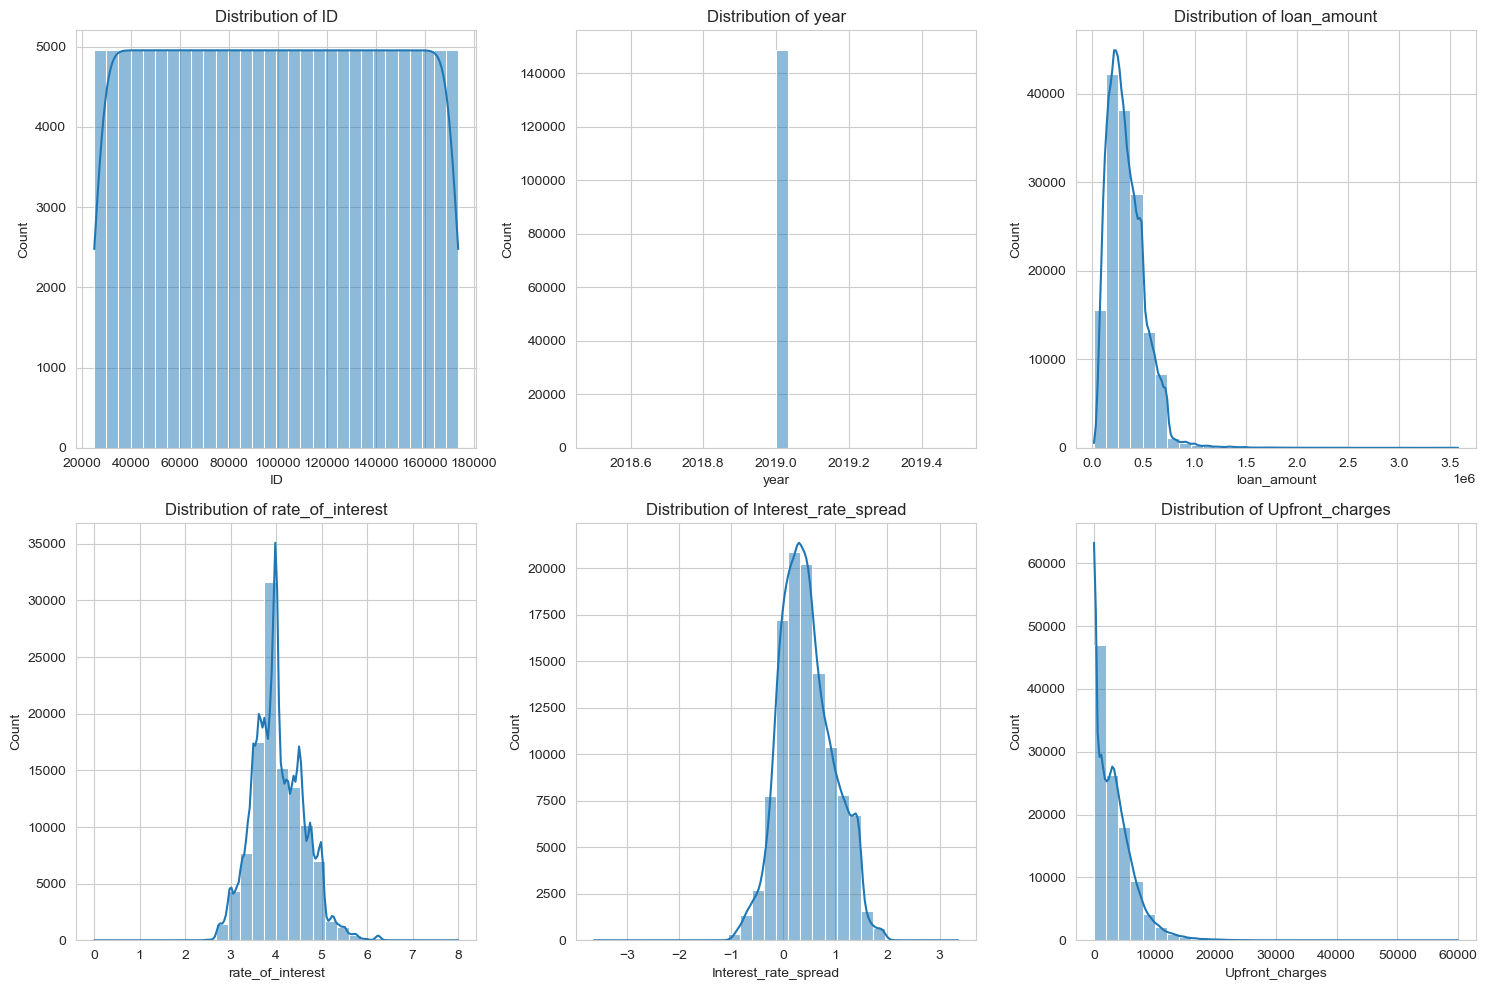

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for Seaborn
sns.set_style("whitegrid")

# --- HISTOGRAMS ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Reduced to 6 histograms
axes = axes.flatten()

for i, col in enumerate(num_cols[:6]):  # Limiting to 6 features
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


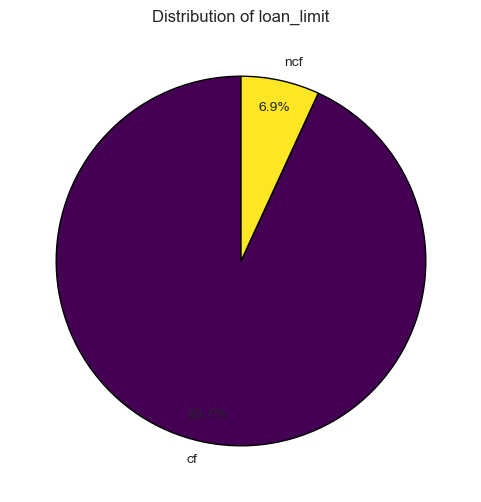

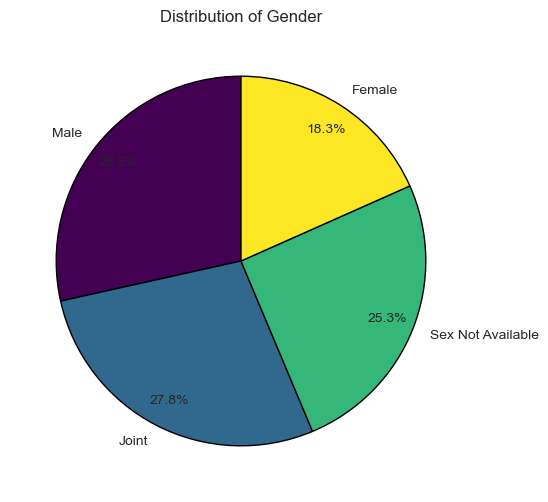

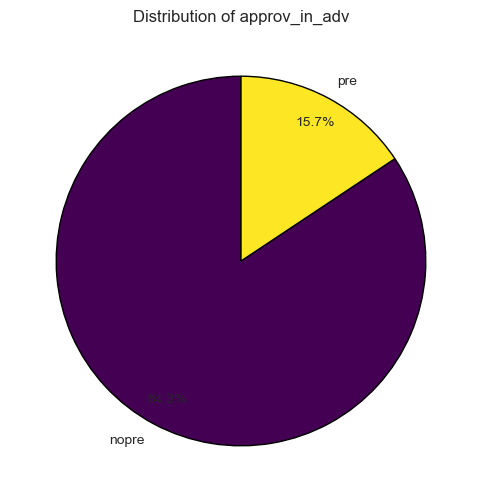

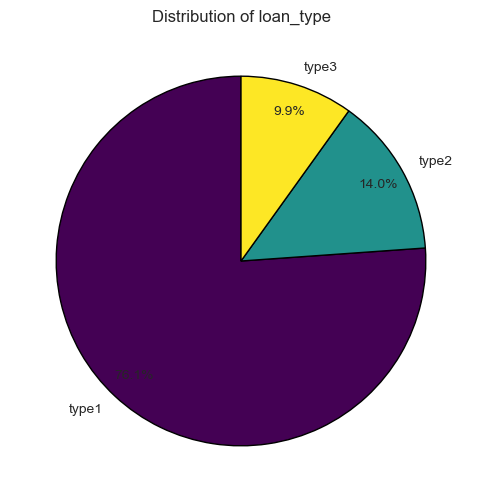

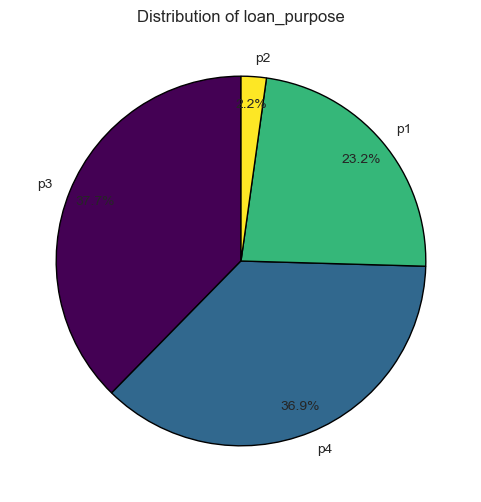

In [8]:
# --- PIE CHARTS ---
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Limiting to 5 pie charts
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()

# --- PIE CHART FOR CUSTOMER INCOME ---
def plot_pie_chart(column, title):
    if column in df.columns:
        bins = np.linspace(df[column].min(), df[column].max(), 6)  # Create 5 bins
        labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
        df[column+'_bin'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
        
        plt.figure(figsize=(7, 7))
        df[column+'_bin'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
        plt.title(title)
        plt.ylabel('')
        plt.show()




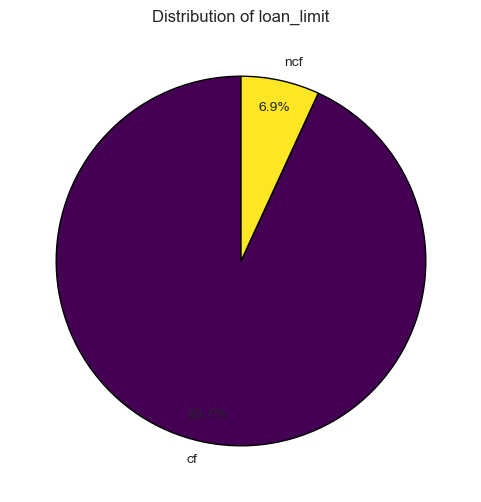

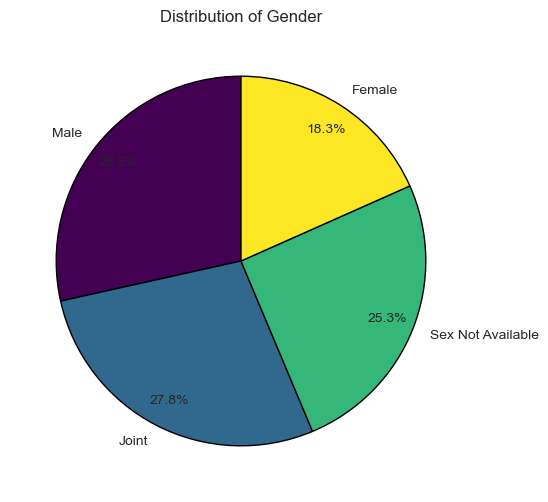

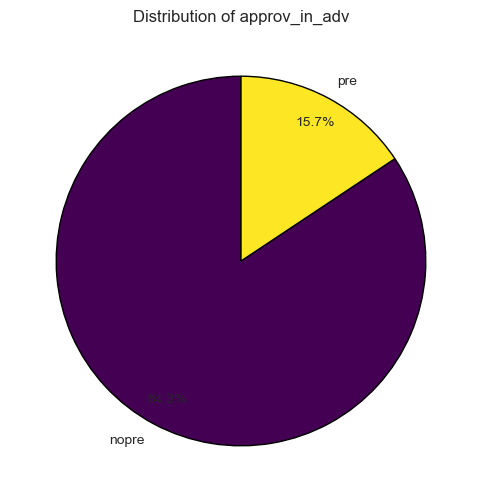

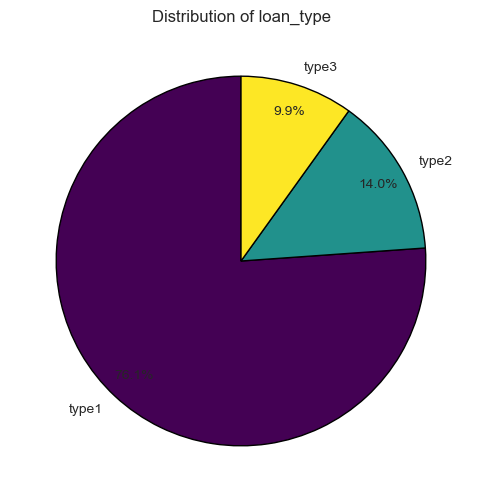

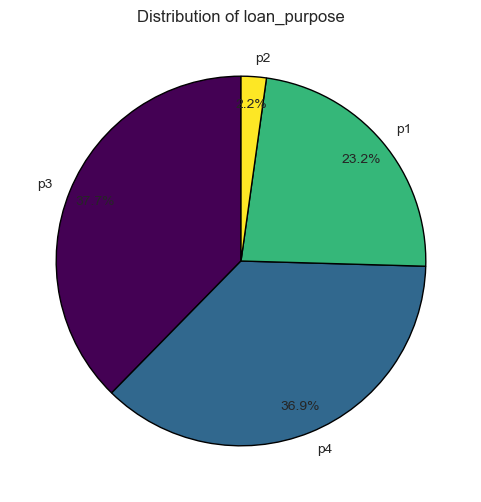

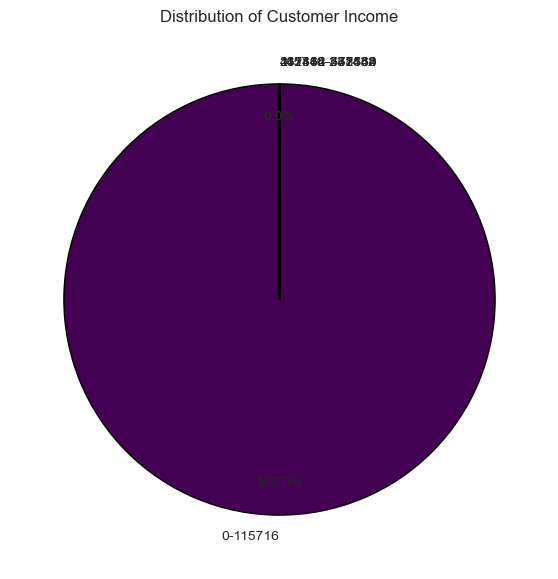

In [15]:
# --- PIE CHARTS ---
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:5]:  # Limiting to 5 pie charts
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()
    
if 'income' in df.columns:
    plot_pie_chart('income', 'Distribution of Customer Income')
# --- PIE CHART FOR LOAN CLASSIFICATION (NCF & CF) ---
if 'loan_status' in df.columns:
    plt.figure(figsize=(7, 7))
    df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    plt.title("Loan Classification (NCF & CF)")
    plt.ylabel('')
    
    # Add text annotations for meanings
    plt.text(1.2, 0.5, "NCF: Non-Creditworthy Fund\nCF: Creditworthy Fund", fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    
    plt.show()


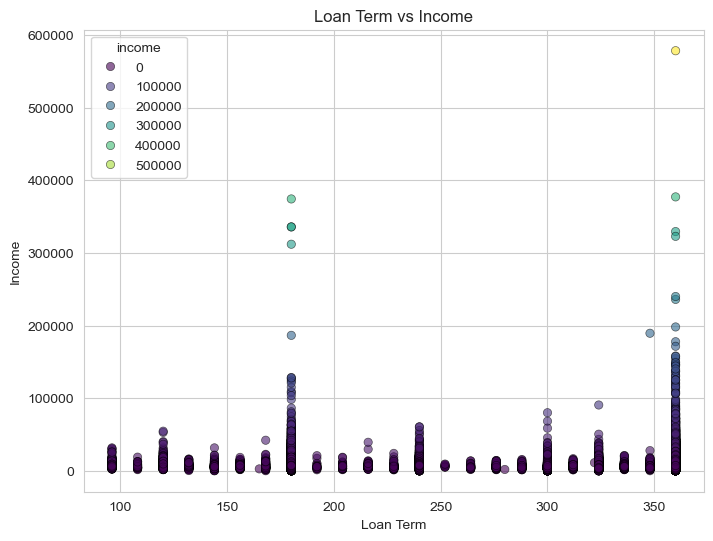

In [14]:
def plot_pie_chart(column, title):
    if column in df.columns:
        bins = np.linspace(df[column].min(), df[column].max(), 6)  # Create 5 bins
        labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
        df[column+'_bin'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
        
        plt.figure(figsize=(7, 7))
        df[column+'_bin'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90, pctdistance=0.85, wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
        plt.title(title)
        plt.ylabel('')
        plt.show()
        
# --- SCATTER PLOTS WITH DISTINCT DOTS ---
if 'customer_age' in df.columns and 'rate_of_interest' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='age', y='rate_of_interest', hue='rate_of_interest', palette='viridis', edgecolor='black', alpha=0.6)
    plt.title("Customer Age vs Loan Interest Rate")
    plt.xlabel("Customer Age")
    plt.ylabel("Loan Interest Rate")
    plt.show()

if 'income' in df.columns and 'term' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='term', y='income', hue='income', palette='viridis', edgecolor='black', alpha=0.6)
    plt.title("Loan Term vs Income")
    plt.xlabel("Loan Term")
    plt.ylabel("Income")
    plt.show()

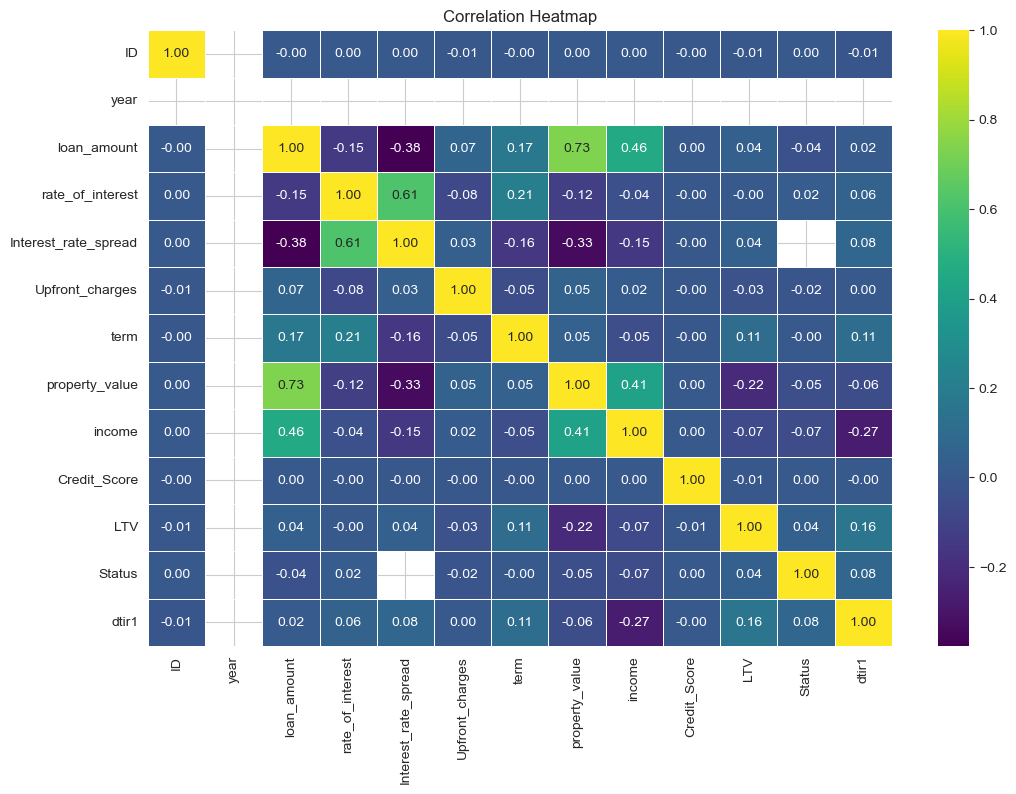

In [13]:
# --- CORRELATION HEAT MAP ---
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()